In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Bootcamp Data Science/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# ¿Cuántas filas y columnas?
# con el codigo ".shape" podemos ver cuantas filas y cuantas columnas tiene el dataframe, en la primera entrada se representan el numero de filas y la segunda entrada representa el numero de columnas.
df.shape

(8523, 12)

In [ ]:
# ¿Cuáles son los tipos de datos en cada variable?
# con el codigo .dtypes podemos ver todas las variables  y sus tipos de datos
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.
df.duplicated()
# Este metodo analiza el dataframe en busca de datos faltantes

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
# para mejor claridad use con el metodo '.duplicates' el metodo '.sum' para sumar todos los valores faltantes
df.duplicated().sum()

0

In [ ]:
#  Identifiquen los valores faltantes.
df.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Cree otra variable de los datos pero sin la columna 'Item_Weigth'
df2=df.drop(['Item_Weight'],axis=1)
# Decidi eliminar la columna 'Item_Weight' porque no la considero util predecir las ventas de productos alimenticios por su peso sin tener contexto de que tipos de produxtos son ya que puede ser futas 

In [ ]:
# Utilice este metodo para reemplazar los datos de la columna 'Outlet_Size' con los outlet mas comunos, ya que considero importante el tamaño del establecimiento para predecir las ventos, poque mientas mas grande el establecimiento mas productos se pueden exibir y almacenar
oulet_count= df2['Outlet_Type'].value_counts()
oulet_comun= oulet_count.index[0]
df2['Outlet_Size'].fillna(oulet_comun, inplace=True

SyntaxError: ignored

In [ ]:
# Confirmen que no hay valores faltantes después de abordarlos.
df2.isnull()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)
df2.describe() # Con este metodo podemos observar los datos minimos, maximos y la media (esta se represnta con el 50%)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:>

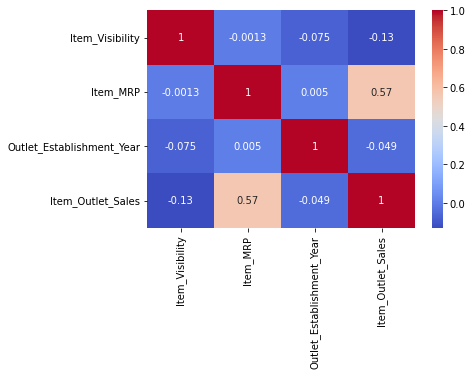

In [ ]:
# Mapa de calor de la correlación entre las características.
sns.heatmap(df2.corr(),annot=True, cmap='coolwarm')

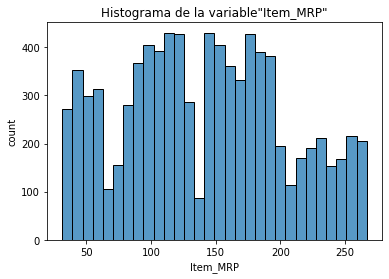

In [ ]:
# Histograma para ver las distribuciones de diversas características en el conjunto de datos.
sns.histplot(data=df2,x= 'Item_MRP', bins=30)
plt.xlabel('Item_MRP')
plt.ylabel('count')
plt.title ('Histograma de la variable"Item_MRP"')
plt.show()

En el histograma podemos interpretar que la mayoría de los precios de los productos se encuentran en el rango de 100 a 200, con una frecuencia cercana a las 1,500 observaciones. A medida que el precio aumenta, la frecuencia disminuye, lo que indica que hay menos productos con precios más altos.


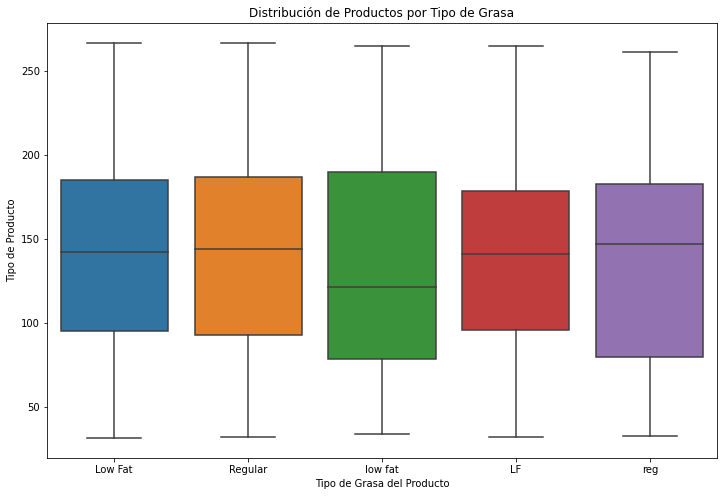

In [ ]:
#Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.
plt.figure(figsize=(12,8))
sns.boxplot(x='Item_Fat_Content', y='Item_MRP', data=df2)
plt.xlabel('Tipo de Grasa del Producto')
plt.ylabel('Tipo de Producto')
plt.title('Distribución de Productos por Tipo de Grasa')
plt.show()

In [ ]:
# Identifiquen el objetivo (X) y las características (y): Asignen la columna "Item_Outlet_Sales" somo el objetivo y el resto de las variables relevantes como el matriz de características.  
X = df2['Item_Outlet_Sales'] 
y = df2.drop('Item_Outlet_Sales', axis=1) 

In [ ]:
# train test split
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(y, X, test_size=0.2, random_state=42)

In [ ]:
# Creen un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático.
# Seleccionar las columnas numéricas
numeric_features = y.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Seleccionar las columnas categóricas
categorical_features = y.select_dtypes(include=['object']).columns.tolist()
# Definir un preprocesador para las columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [ ]:
# Definir un preprocesador para las columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Combinar los preprocesadores en un preprocesador general
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
# Crear un pipeline completo con el preprocesador y el modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])